In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from env import host, user, password
import wrangle


# Acquire

In [3]:
df = wrangle.new_zillow_data()

In [4]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,lotsizesquarefeet,regionidzip,yearbuilt,poolcnt,fireplacecnt
0,4.0,3.5,3100.0,1023282.0,4506.0,96978.0,1998.0,NaN,NaN
1,2.0,1.0,1465.0,464000.0,12647.0,97099.0,1967.0,NaN,1.0
2,3.0,2.0,1243.0,564778.0,8432.0,97078.0,1962.0,1.0,NaN
3,4.0,3.0,2376.0,145143.0,13038.0,96330.0,1970.0,1.0,NaN
4,4.0,3.0,2962.0,773303.0,63000.0,96293.0,1950.0,1.0,NaN


In [5]:
df.shape

(52441, 9)

# Prepare

In [6]:
df.rename(columns = {'bedroomcnt':'bed', 'bathroomcnt':'bath', 'calculatedfinishedsquarefeet':'square_feet', 'taxvaluedollarcnt':'price', 'lotsizesquarefeet':'lot_square_feet', 'regionidzip':'zipcode', 'yearbuilt':'year_built', 'poolcnt':'pool', 'fireplacecnt':'fireplace'}, inplace=True)

In [7]:
df.columns

Index(['bed', 'bath', 'square_feet', 'price', 'lot_square_feet', 'zipcode',
       'year_built', 'pool', 'fireplace'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bed              52441 non-null  float64
 1   bath             52441 non-null  float64
 2   square_feet      52359 non-null  float64
 3   price            52440 non-null  float64
 4   lot_square_feet  52072 non-null  float64
 5   zipcode          52415 non-null  float64
 6   year_built       52325 non-null  float64
 7   pool             11096 non-null  float64
 8   fireplace        7243 non-null   float64
dtypes: float64(9)
memory usage: 3.6 MB


In [9]:
df.isnull().sum()

bed                    0
bath                   0
square_feet           82
price                  1
lot_square_feet      369
zipcode               26
year_built           116
pool               41345
fireplace          45198
dtype: int64

In [10]:
df.pool.value_counts()

1.0    11096
Name: pool, dtype: int64

In [12]:
df.fireplace.value_counts()

1.0    6031
2.0     945
3.0     229
4.0      35
5.0       3
Name: fireplace, dtype: int64

I am going to assume that a null value in the pool and fireplace columns means no pool or fireplace and I will change the data to reflect that. 

In [16]:
df.fireplace = df.fireplace.fillna(value=0)
df.pool = df.pool.fillna(value=0)

In [19]:
df.pool.value_counts()

0.0    41345
1.0    11096
Name: pool, dtype: int64

In [20]:
df.fireplace.value_counts()

0.0    45198
1.0     6031
2.0      945
3.0      229
4.0       35
5.0        3
Name: fireplace, dtype: int64

In [21]:
df.isnull().sum()

bed                  0
bath                 0
square_feet         82
price                1
lot_square_feet    369
zipcode             26
year_built         116
pool                 0
fireplace            0
dtype: int64

The remaining data with nulls is very low, so I will just drop them.

In [22]:
df = df.dropna()

In [23]:
df.shape

(51953, 9)

<function matplotlib.pyplot.show(close=None, block=None)>

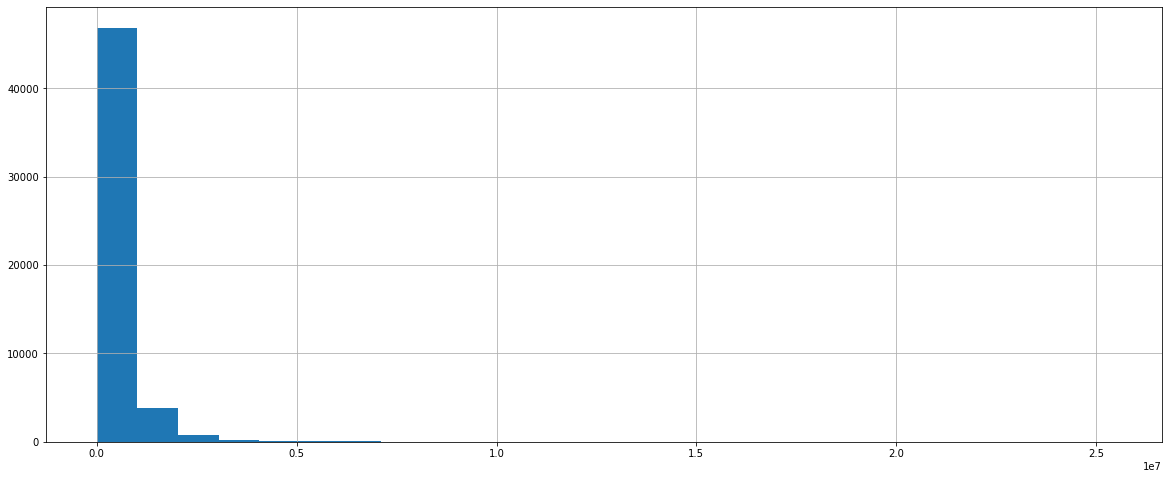

In [24]:
plt.figure(figsize=(20, 8))
df.price.hist(bins=25)
plt.show

In [26]:
len(df.price[df.price <= 2000000])/len(df)

0.9741112159066849

<function matplotlib.pyplot.show(close=None, block=None)>

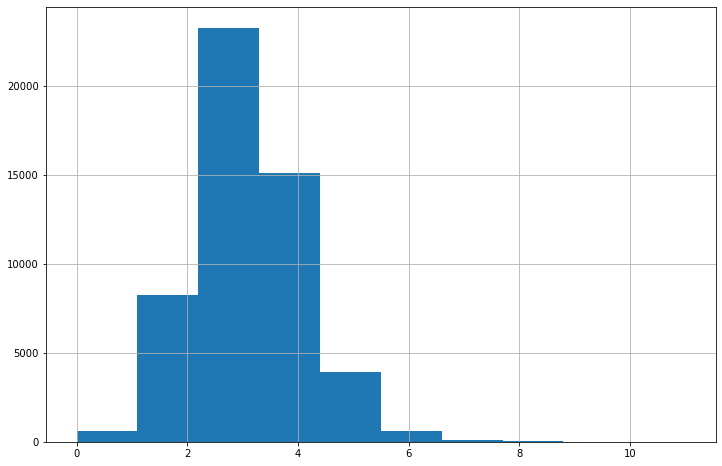

In [28]:
plt.figure(figsize=(12, 8))
df.bed.hist(bins=10)
plt.show

In [29]:
len(df.bed[df.bed <= 6])/len(df)

0.997343753007526

<function matplotlib.pyplot.show(close=None, block=None)>

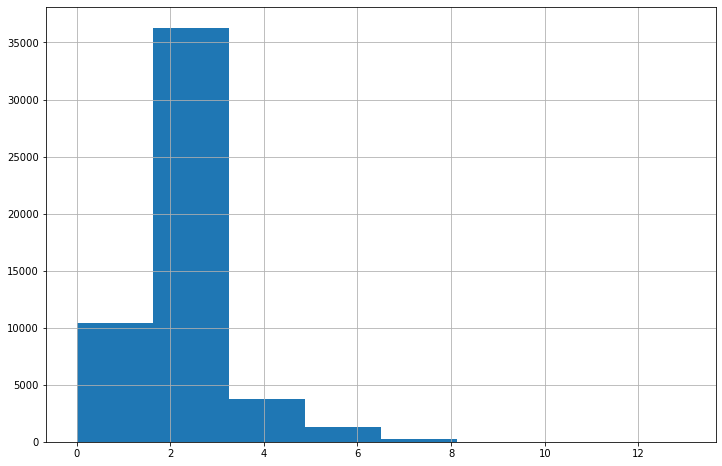

In [30]:
plt.figure(figsize=(12, 8))
df.bath.hist(bins=8)
plt.show

In [31]:
len(df.bath[df.bath <= 6])/len(df)

0.9956691625122707

<function matplotlib.pyplot.show(close=None, block=None)>

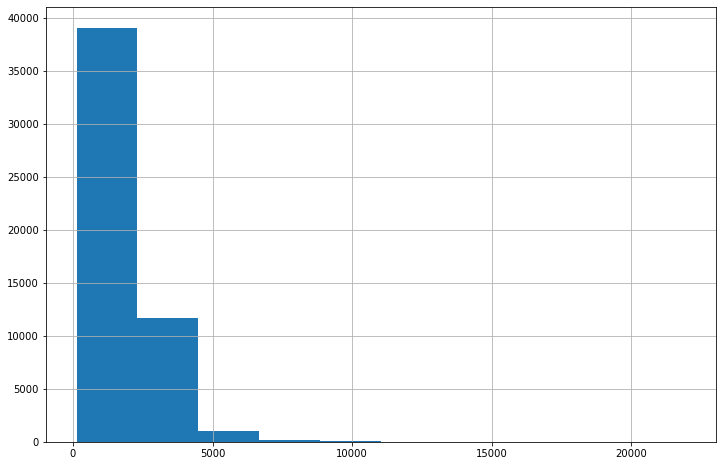

In [32]:
plt.figure(figsize=(12, 8))
df.square_feet.hist(bins=10)
plt.show

In [33]:
len(df.square_feet[df.square_feet <= 6000])/len(df)

0.9933016380189786

In [34]:
df.head(3)

,bed,bath,square_feet,price,lot_square_feet,zipcode,year_built,pool,fireplace
0,4.0,3.5,3100.0,1023282.0,4506.0,96978.0,1998.0,0.0,0.0
1,2.0,1.0,1465.0,464000.0,12647.0,97099.0,1967.0,0.0,1.0
2,3.0,2.0,1243.0,564778.0,8432.0,97078.0,1962.0,1.0,0.0


In [38]:
df.year_built.value_counts()

1955.0    1896
1950.0    1604
1954.0    1516
1953.0    1483
1956.0    1381
          ... 
1892.0       1
1878.0       1
1882.0       1
1894.0       1
1880.0       1
Name: year_built, Length: 133, dtype: int64

In [39]:
df = df[df.bed <= 6]
df = df[df.bath <=6]
df = df[df.price <= 2000000]
df = df[df.square_feet <= 6000]

In [43]:
df = df[df.bed > 0]
df = df[df.bath > 0]

In [44]:
df.shape

(50340, 9)

# Explore

## Questions:
1. Is there a relationship between house square feet and price?
2. Are houses with more bedrooms worth more than houses with less rooms?
3. Are houses with more bathrooms worth more than houses with less bathrooms
4. Do house square feet and plot square feet have the same effect on price?
5. Does the age of a house significantly affect the price?
6. What are the best predictors of price?

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
train, valid_test = train_test_split(df, test_size = 0.3, random_state = 123)

validate, test = train_test_split(valid_test, test_size = 0.5, random_state=123)

In [48]:
train.shape

(35238, 9)

In [49]:
validate.shape

(7551, 9)

In [50]:
test.shape

(7551, 9)

<AxesSubplot:>

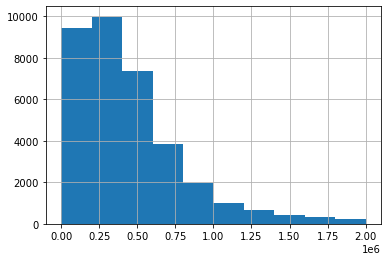

In [51]:
train.price.hist()

<AxesSubplot:>

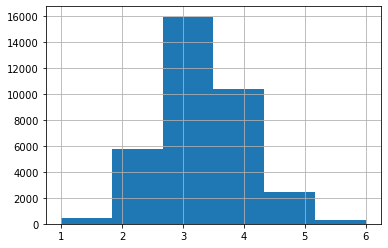

In [52]:
train.bed.hist(bins=6)

<AxesSubplot:>

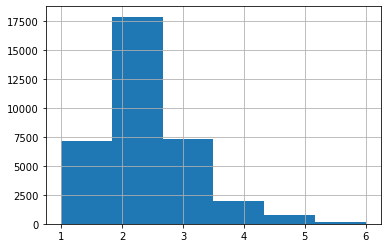

In [53]:
train.bath.hist(bins=6)

<AxesSubplot:>

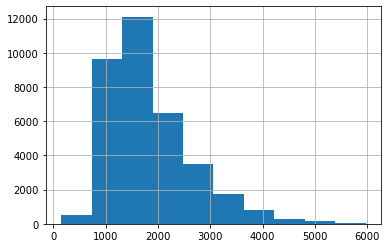

In [54]:
train.square_feet.hist()

<AxesSubplot:>

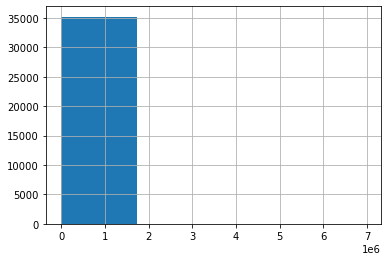

In [62]:
train.lot_square_feet.hist(bins=4)

<AxesSubplot:>

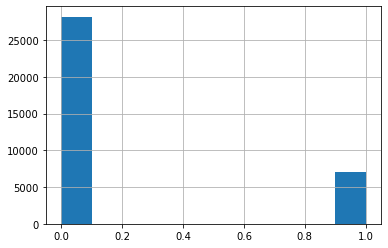

In [65]:
train.pool.hist()

<AxesSubplot:>

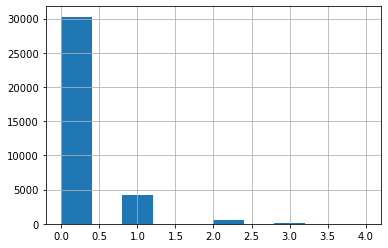

In [66]:
train.fireplace.hist()

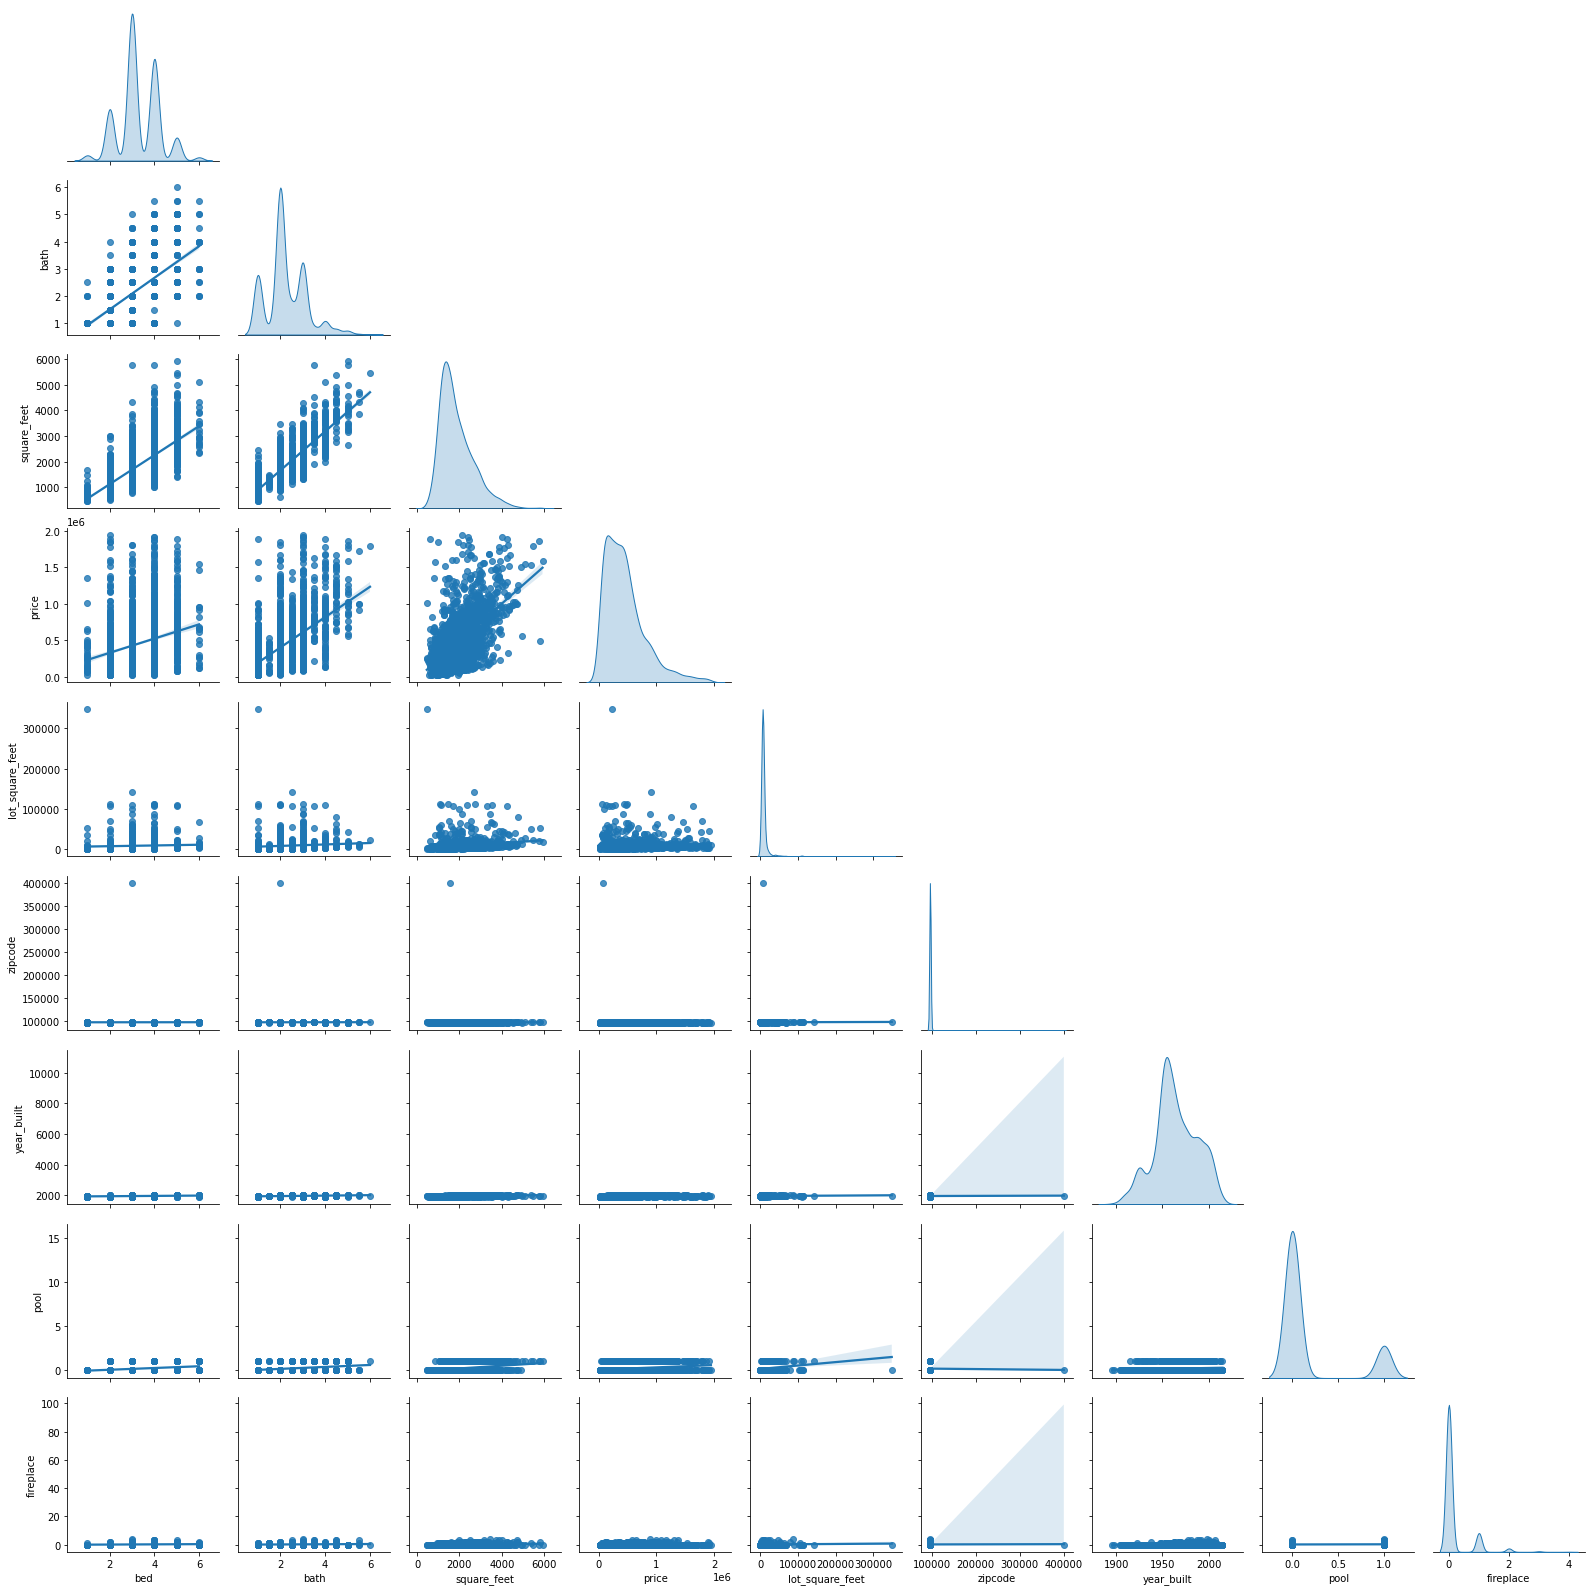

In [67]:
sns.pairplot(data=train.sample(2000), kind='reg', diag_kind='kde', corner=True)

In [68]:
train.corr()

,bed,bath,square_feet,price,lot_square_feet,zipcode,year_built,pool,fireplace
bed,1.000000,0.628237,0.634059,0.268373,0.005351,0.026109,0.394494,0.235903,0.153395
bath,0.628237,1.000000,0.830189,0.496660,0.020498,0.029872,0.549718,0.285789,0.155698
square_feet,0.634059,0.830189,1.000000,0.570500,0.030443,0.024834,0.495675,0.335225,0.198123
price,0.268373,0.496660,0.570500,1.000000,0.008421,0.009101,0.240597,0.228575,0.120608
lot_square_feet,0.005351,0.020498,0.030443,0.008421,1.000000,0.005108,0.030957,0.012843,0.003993
zipcode,0.026109,0.029872,0.024834,0.009101,0.005108,1.000000,0.058881,0.022659,0.025421
year_built,0.394494,0.549718,0.495675,0.240597,0.030957,0.058881,1.000000,0.110152,0.205840
pool,0.235903,0.285789,0.335225,0.228575,0.012843,0.022659,0.110152,1.000000,0.095299
fireplace,0.153395,0.155698,0.198123,0.120608,0.003993,0.025421,0.205840,0.095299,1.000000


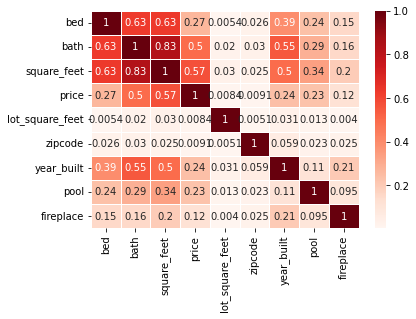

In [72]:
sns.heatmap(train.corr(), cmap='Reds', annot=True, linewidth=0.5)
plt.show()
#mask=np.triu(train.corr()

It appears that square feet is most correlated with price, followed by the number of bathrooms, which surprisingly is much more correlated to price than bedrooms.

## 1. Is there a relationship between square feet and price?

<AxesSubplot:xlabel='square_feet', ylabel='price'>

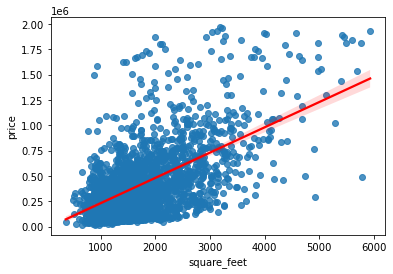

In [81]:
sns.regplot(data=train.sample(2000), x='square_feet', y='price', line_kws={'color':'red'})

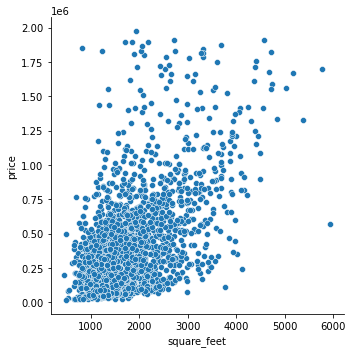

In [82]:
sns.relplot(data=train.sample(2000), x='square_feet', y='price')

There is a lot of noise, but there does appear to be some sort of relationship between square feet and price, although perhaps not perfectly linear.

In [84]:
train.square_feet.value_counts()

1200.0    81
1120.0    77
1080.0    71
936.0     61
1176.0    60
          ..
3954.0     1
5910.0     1
326.0      1
4026.0     1
411.0      1
Name: square_feet, Length: 3804, dtype: int64

### stat test question 1.

### Null Hypothesis: There is no correlation between square feet and price. 

### Alternative Hypothesis: There is a correlation between square feet and price.

In [88]:
# Because both price and square feet are continuous, and because the price data is not normally distributed, I will be using the spearman r test.
corr, p = stats.spearmanr(train.square_feet, train.price)
corr, p

(0.4946459832902056, 0.0)

Based on the test I can reject the null hypothesis, seeing as how there appears to be a relationship between square feet and price.

## 2. Are houses with more bedrooms worth more than houses with less rooms?
## Or, Does the number of bedrooms affect the price of a house?

### Null Hypothesis: There is no relationship between the number of bedrooms and the price of a house.

### Alternative Hypothesis: There is a relationship between the number of bedrooms and the price of a house.

<AxesSubplot:xlabel='bed', ylabel='price'>

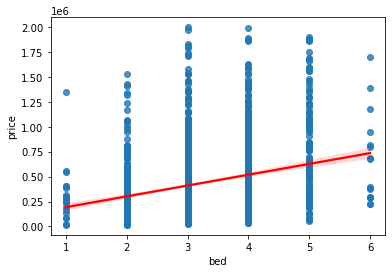

In [89]:
sns.regplot(data=train.sample(2000), x='bed', y='price', line_kws={'color':'red'})

In [96]:
alpha = 0.05

In [97]:
f, p = stats.f_oneway(train.price[train.bed == 1], train.price[train.bed == 2], train.price[train.bed == 3], train.price[train.bed == 4], train.price[train.bed == 5], train.price[train.bed == 6])
f, p

(602.9306976143548, 0.0)

Based on the test I can reject the null hypothesis that the number of bedrooms does not affect the price of the house. 

## 3. Are house with more bathrooms worth more than houses with less bathrooms?
## Or, Does the number of bathrooms affect the price of a house?

### Null Hypothesis: There is no relationship between the number of bathrooms and the price of a house.

### Alternative Hypothesis: There is a relationship between the number of bathrooms and the price of a house.

<AxesSubplot:xlabel='bath', ylabel='price'>

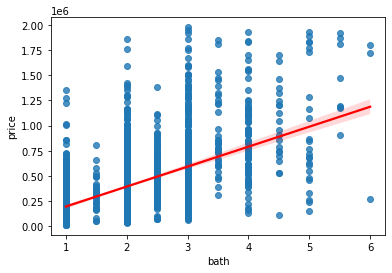

In [98]:
sns.regplot(data=train.sample(2000), x='bath', y='price', line_kws={'color':'red'})

In [99]:
alpha = 0.05

In [100]:
f, p = stats.f_oneway(train.price[train.bath == 1], train.price[train.bath == 2], train.price[train.bath == 3], train.price[train.bath == 4], train.price[train.bath == 5], train.price[train.bath == 6])
f, p

(1657.438552369102, 0.0)

Based on the test results I can reject the null hypothesis that there is no relationship between the number of bathrooms and the price of a house.

## 4. Does the age of a house affect price?

### Null Hypothesis: There is no relationship between the age of a house and it's price.

### Alternative Hypothesis: There is a relationship between the age of a house and it's price.

<AxesSubplot:xlabel='year_built', ylabel='price'>

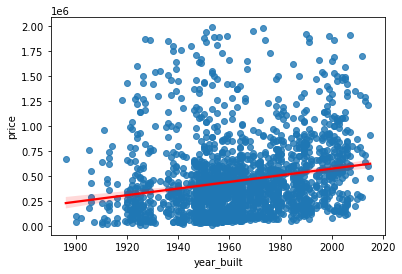

In [102]:
sns.regplot(data=train.sample(2000), x='year_built', y='price', line_kws={'color':'red'})

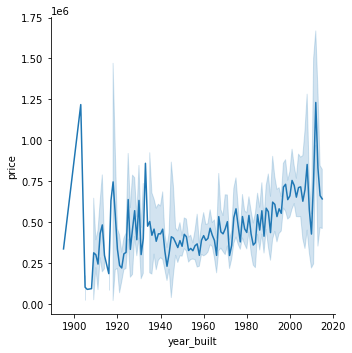

In [104]:
sns.relplot(data=train.sample(2000), x='year_built', y='price', kind='line')

Generally speaking it does appear that as the year built approaches the present time, house prices increase.

In [105]:
corr, p = stats.spearmanr(train.year_built, train.price)
corr, p

(0.2690936037540229, 0.0)

There does appear to be a weak correlation between year built and price, allowing me to reject the null hypothesis.

In [87]:
from scipy import stats

Based on the correlation coefficient and the p-value, I reject my null hypothesis that there is no correlation between the number of bathrooms and price. There does appear to be a moderate linear relationship.

There appears to be a weak linear relationship between the number of bedrooms and home price.

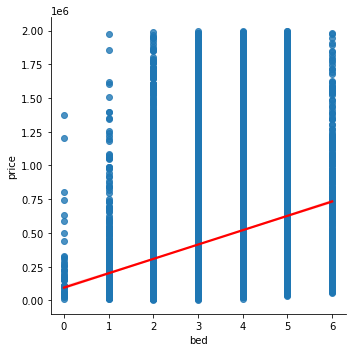

In [98]:
sns.lmplot(x='bed', y='price', data=train, line_kws={'color':'red'})
plt.show()

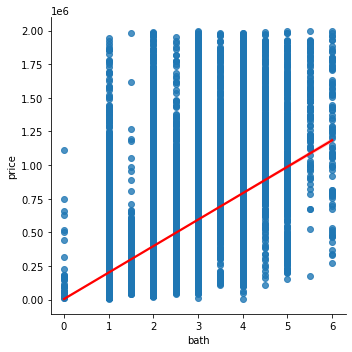

In [94]:
sns.lmplot(x='bath', y='price', data=train, line_kws={'color':'red'})
plt.show()

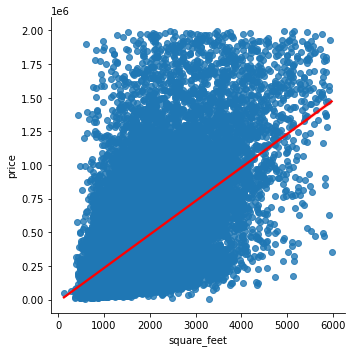

In [95]:
sns.lmplot(x='square_feet', y='price', data=train, line_kws={'color':'red'})
plt.show()

In [100]:
#sns.boxplot(x='bed', y='price', data=train)

# Feature Engineering

In [25]:
train.head(3)

,bed,bath,square_feet,price
22037,3.0,1.0,1416.0,48620.0
40038,2.0,2.0,1462.0,285992.0
36765,3.0,2.0,2086.0,305095.0


In [106]:
y_train = train.price
x_train = train.drop(columns = ['price'])

y_validate = validate.price
x_validate = validate.drop(columns = ['price'])

y_test = test.price
x_test = test.drop(columns = ['price'])

In [107]:
import sklearn.preprocessing

### Select K Best

In [211]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

In [30]:
x_train_scaled_df = pd.DataFrame(data = x_train_scaled, columns = ['bed', 'bath', 'square_feet'])

In [32]:
x_validate_scaled_df = pd.DataFrame(data = x_validate_scaled, columns = ['bed', 'bath', 'square_feet'])
x_test_scaled_df = pd.DataFrame(data = x_test_scaled, columns = ['bed', 'bath', 'square_feet'])

In [109]:
from sklearn.feature_selection import SelectKBest, f_regression

In [190]:
kbest = SelectKBest(f_regression, k=4)

kbest.fit(x_train_scaled, y_train.price)

SelectKBest(k=4, score_func=<function f_regression at 0x16946a1f0>)

In [191]:
kbest_results = pd.DataFrame(dict(p=kbest.pvalues_, f=kbest.scores_), index=x_train.columns)

In [192]:
kbest_results

,p,f
bed,0.000000e+00,2734.808056
bath,0.000000e+00,11537.734892
square_feet,0.000000e+00,17001.894530
lot_square_feet,1.139272e-01,2.499005
zipcode,8.755571e-02,2.918911
year_built,0.000000e+00,2165.034881
pool,0.000000e+00,1942.453232
fireplace,2.687379e-114,520.118817


In [128]:
x_train.columns[kbest.get_support()]

Index(['bed', 'bath', 'square_feet', 'year_built'], dtype='object')

In [186]:
# Robust Scaler process

In [217]:
scaler = sklearn.preprocessing.RobustScaler()

scaler.fit(x_train)

x_train_robust = scaler.transform(x_train)
x_validate_robust = scaler.transform(x_validate)
x_test_robust = scaler.transform(x_test)

In [218]:
kbest = SelectKBest(f_regression, k=4)

kbest.fit(x_train_robust, y_train.price)

SelectKBest(k=4, score_func=<function f_regression at 0x16946a1f0>)

In [219]:
kbest_results

,p,f
bed,0.000000e+00,2734.808056
bath,0.000000e+00,11537.734892
square_feet,0.000000e+00,17001.894530
lot_square_feet,1.139272e-01,2.499005
zipcode,8.755571e-02,2.918911
year_built,0.000000e+00,2165.034881
pool,0.000000e+00,1942.453232
fireplace,2.687379e-114,520.118817


In [222]:
x_train.head(2)

,bed,bath,square_feet,lot_square_feet,zipcode,year_built,pool,fireplace
49316,3.0,2.0,1714.0,25511.0,97118.0,1978.0,0.0,1.0
50671,3.0,2.0,1118.0,7506.0,96524.0,1951.0,0.0,0.0


In [224]:
x_train_1st = x_train.drop(columns=['lot_square_feet', 'zipcode', 'year_built', 'pool', 'fireplace'])

In [253]:
x_validate_1st = x_validate.drop(columns=['lot_square_feet', 'zipcode', 'year_built', 'pool', 'fireplace'])
x_test_1st = x_test.drop(columns=['lot_square_feet', 'zipcode', 'year_built', 'pool', 'fireplace'])

In [254]:
scaler = sklearn.preprocessing.RobustScaler()

scaler.fit(x_train_1st)

x_train_1st_robust = scaler.transform(x_train_1st)
x_validate_1st_robust = scaler.transform(x_validate_1st)
x_test_1st_robust = scaler.transform(x_test_1st)

### RFE

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, f_regression, SequentialFeatureSelector

In [131]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select = 4)
rfe.fit(x_train_scaled, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [133]:
# x_train_scaled.columns[rfe.get_support()]

In [134]:
var_ranks = rfe.ranking_

In [136]:
var_names = x_train.columns.tolist()

In [137]:
var_names

['bed',
 'bath',
 'square_feet',
 'lot_square_feet',
 'zipcode',
 'year_built',
 'pool',
 'fireplace']

In [138]:
rfe_ranks_df = pd.DataFrame({'Var':var_names, 'Rank':var_ranks})

In [139]:
rfe_ranks_df.sort_values('Rank')

,Var,Rank
0,bed,1
1,bath,1
2,square_feet,1
3,lot_square_feet,1
5,year_built,2
7,fireplace,3
4,zipcode,4
6,pool,5


# Modeling

In [145]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

### Baseline

In [140]:
y_train.mean()

442804.77603723254

In [141]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [142]:
y_train['baseline'] = y_train.price.mean()
y_validate['baseline'] = y_validate.price.mean()

In [143]:
y_train.head(2)

,price,baseline
49316,692000.0,442804.776037
50671,345767.0,442804.776037


In [146]:
rmse_train = mean_squared_error(y_train.price, y_train.baseline)**(1/2)
rmse_validate = mean_squared_error(y_validate.price, y_validate.baseline)**(1/2)

In [147]:
rmse_train

352181.7661389873

In [148]:
rmse_validate

355365.5610374661

In [160]:
x_train.head(2)

,bed,bath,square_feet,lot_square_feet,zipcode,year_built,pool,fireplace
49316,3.0,2.0,1714.0,25511.0,97118.0,1978.0,0.0,1.0
50671,3.0,2.0,1118.0,7506.0,96524.0,1951.0,0.0,0.0


In [161]:
x_train_model = pd.DataFrame(x_train_scaled, columns=['bed', 'bath', 'square_feet', 'lot_square_feet', 'zipcode', 'year_built', 'pool', 'fireplace'])

In [163]:
x_train_model = x_train_model.drop(columns = ['lot_square_feet', 'fireplace', 'pool', 'zipcode'])

In [164]:
x_train_model.columns

Index(['bed', 'bath', 'square_feet', 'year_built'], dtype='object')

In [172]:
x_validate_model = pd.DataFrame(x_validate_scaled, columns=['bed', 'bath', 'square_feet', 'lot_square_feet', 'zipcode', 'year_built', 'pool', 'fireplace'])
x_validate_model = x_validate_model.drop(columns = ['lot_square_feet', 'fireplace', 'pool', 'zipcode'])

### Linear Regression (OLS)

In [ ]:
# Original model with three features

In [166]:
lm = LinearRegression(normalize=True)

In [167]:
lm.fit(x_train_scaled, y_train.price)

LinearRegression(normalize=True)

In [151]:
y_train['price_pred_lm'] = lm.predict(x_train_scaled)

In [152]:
rmse_train = mean_squared_error(y_train.price, y_train.price_pred_lm)**(1/2)

In [153]:
y_validate['price_pred_lm'] = lm.predict(x_validate_scaled)

In [83]:
rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_lm)**(1/2)

In [84]:
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  285566.56875731796 
Validation/Out-of-Sample:  286649.5781407932


In [165]:
# New model with four features

In [168]:
lm = LinearRegression(normalize=True)

In [169]:
lm.fit(x_train_model, y_train.price)

LinearRegression(normalize=True)

In [177]:
y_train['price_pred_lm2'] = lm.predict(x_train_model)
rmse_train = mean_squared_error(y_train.price, y_train.price_pred_lm2)**(1/2)

y_validate['price_pred_lm2'] = lm.predict(x_validate_model)
rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_lm2)**(1/2)

In [178]:
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  284308.63195880473 
Validation/Out-of-Sample:  287750.0910490834


In [195]:
# New model using Robust Scaler

In [239]:
lm = LinearRegression(normalize=True)
lm.fit(x_train_robust, y_train.price)

LinearRegression(normalize=True)

In [240]:
y_train['price_pred_lm2_robust'] = lm.predict(x_train_robust)
rmse_train = mean_squared_error(y_train.price, y_train.price_pred_lm2_robust)**(1/2)

y_validate['price_pred_lm2_robust'] = lm.predict(x_validate_robust)
rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_lm2_robust)**(1/2)

In [241]:
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  283869.42218233045 
Validation/Out-of-Sample:  287348.520744239


In [229]:
# New model with original three feature and Robust Scaler

In [255]:
lm = LinearRegression(normalize=True)
lm.fit(x_train_1st_robust, y_train.price)

LinearRegression(normalize=True)

In [256]:
y_train['price_pred_lm_robust'] = lm.predict(x_train_1st_robust)
rmse_train = mean_squared_error(y_train.price, y_train.price_pred_lm_robust)**(1/2)

y_validate['price_pred_lm_robust'] = lm.predict(x_validate_1st_robust)
rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_lm_robust)**(1/2)

In [257]:
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  284981.66107545304 
Validation/Out-of-Sample:  288431.29889462446


### Lasso Lars

In [85]:
lars = LassoLars(alpha=1.0)

In [86]:
lars.fit(x_train_scaled, y_train.price)

LassoLars()

In [87]:
y_train['price_pred_lars'] = lars.predict(x_train_scaled)

In [88]:
rmse_train = mean_squared_error(y_train.price, y_train.price_pred_lars)**(1/2)

In [89]:
y_validate['price_pred_lars'] = lars.predict(x_validate_scaled)

In [90]:
rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_lars)**(1/2)

In [91]:
print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  285566.94918727194 
Validation/Out-of-Sample:  286654.6608343361


In [175]:
# New model with four features

In [176]:
lars = LassoLars(alpha=1.0)
lars.fit(x_train_model, y_train.price)

LassoLars()

In [179]:
y_train['price_pred_lars2'] = lars.predict(x_train_model)
rmse_train = mean_squared_error(y_train.price, y_train.price_pred_lars2)**(1/2)

y_validate['price_pred_lars2'] = lars.predict(x_validate_model)
rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_lars2)**(1/2)

In [180]:
print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  284309.206084717 
Validation/Out-of-Sample:  287749.6142054179


In [199]:
# New model using Robust Scaler

In [200]:
lars = LassoLars(alpha=1.0)
lars.fit(x_train_robust, y_train.price)

LassoLars()

In [201]:
y_train['price_pred_lars2_robust'] = lars.predict(x_train_robust)
rmse_train = mean_squared_error(y_train.price, y_train.price_pred_lars2_robust)**(1/2)

y_validate['price_pred_lars2_robust'] = lars.predict(x_validate_robust)
rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_lars2_robust)**(1/2)

In [202]:
print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  283870.2232359521 
Validation/Out-of-Sample:  287350.50448187115


### Tweedie Regressor (GLM)

In [92]:
glm = TweedieRegressor(power=1, alpha=0)

In [93]:
glm.fit(x_train_scaled, y_train.price)

TweedieRegressor(alpha=0, power=1)

In [94]:
y_train['price_pred_glm'] = glm.predict(x_train_scaled)

In [95]:
rmse_train = mean_squared_error(y_train.price, y_train.price_pred_glm)**(1/2)

In [96]:
y_validate['price_pred_glm'] = glm.predict(x_validate_scaled)

In [97]:
rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_glm)**(1/2)

In [98]:
print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  290283.4127353896 
Validation/Out-of-Sample:  290895.7112194505


In [182]:
# New model with four features

In [183]:
glm = TweedieRegressor(power=1, alpha=0)
glm.fit(x_train_model, y_train.price)

TweedieRegressor(alpha=0, power=1)

In [184]:
y_train['price_pred_glm2'] = glm.predict(x_train_model)
rmse_train = mean_squared_error(y_train.price, y_train.price_pred_glm2)**(1/2)

y_validate['price_pred_glm2'] = glm.predict(x_validate_model)
rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_glm2)**(1/2)

In [185]:
print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  289662.4029527998 
Validation/Out-of-Sample:  294327.0646398507


In [203]:
# New model with Robust Scaler

In [204]:
glm = TweedieRegressor(power=1, alpha=0)
glm.fit(x_train_robust, y_train.price)

TweedieRegressor(alpha=0, power=1)

In [205]:
y_train['price_pred_glm2_robust'] = glm.predict(x_train_robust)
rmse_train = mean_squared_error(y_train.price, y_train.price_pred_glm2_robust)**(1/2)

y_validate['price_pred_glm2_robust'] = glm.predict(x_validate_robust)
rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_glm2_robust)**(1/2)

In [206]:
print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  352181.7661389873 
Validation/Out-of-Sample:  355382.4068705387


### Polynomial Regression

In [99]:
pf = PolynomialFeatures(degree=2)

In [100]:
x_train_degree2 = pf.fit_transform(x_train_scaled)

In [101]:
x_validate_degree2 = pf.transform(x_validate_scaled)

In [102]:
lm2 = LinearRegression(normalize = True)

In [103]:
lm2.fit(x_train_degree2, y_train.price)

LinearRegression(normalize=True)

In [104]:
y_train['price_pred_lm2'] = lm2.predict(x_train_degree2)

In [105]:
rmse_train = mean_squared_error(y_train.price, y_train.price_pred_lm2)**(1/2)

In [106]:
y_validate['price_pred_lm2'] = lm2.predict(x_validate_degree2)

In [107]:
rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_lm2)

In [108]:
print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  284567.62653866276 
Validation/Out-of-Sample:  81461022105.52779


Due to the absolutely poor perfomance by the Polynomial Regression model, I will not be conducting further work on it moving forward.

Due to the performance of these models, I believe the Linear Regression model should be used moving forward.

All of my 2nd Gen models performed slightly worse than the 1st Gen models on validate. Next I will use a different scaler to see if that provides better results. 